In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.pylab as pl

In [2]:
%matplotlib inline

In [3]:
os.getcwd()

'/home/chen/coding/projects/dnpsoup/dnpsoup_analytics'

In [4]:
datadir = 'outputs/Top-DNP/'

In [8]:
if not os.path.exists('assets/TOPDNP'):
    os.makedirs('assets/TOPDNP')

In [5]:
res = [elem for elem in os.listdir(datadir) if 'xband' in elem ]
res

['eH_loop512_xband_zcw233_em_fp.result',
 'eH_loop512_xband_zcw377_em_fp.result',
 'eH_loop20k_xband_zcw377_em_fp.result',
 'eH_loop512_xband_zcw144_em_fp.result',
 'eH_loop512_xband_zcw610_em_fp.result',
 'eH_loop10k_xband_zcw377_em_fp.result',
 'eH_loop5k_xband_zcw377_em_fp.result',
 'eH_loop40k_xband_zcw377_em_fp.result',
 'eH_loop512_xband_zcw377_scan1d_loop.result']

## Top-DNP

### X-Band

#### Field Profile w.r.t. ZCW Levels with 512 loops

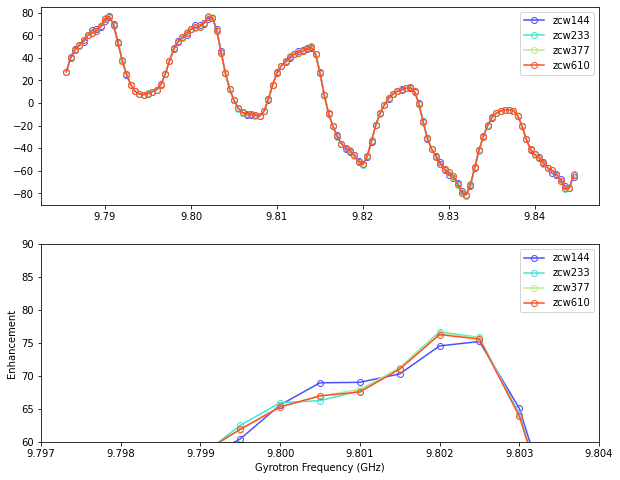

In [6]:
powder_options = [
    'zcw144',     # took 3.954 seconds
    'zcw233',     # took 6.358 seconds
    'zcw377',     # took 10.161 seconds
    'zcw610',     # took 16.264 seconds
]

filenames = [
    f'eH_loop512_xband_{powder}_em_fp.result' for powder in powder_options
]

fig, axes = plt.subplots(2,1, figsize=(10, 8))

n = len(filenames)
colors = plt.cm.rainbow(np.linspace(0.1,0.9,n))
for filename, color, powder in zip(filenames, colors, powder_options):
    filepath = os.path.join(datadir, filename)
    df = pd.read_csv(filepath, skiprows=2, header=None)
    axes[0].plot(df[0]/1e9, df[1], color=color, marker='o', markerfacecolor='none', label=powder)
    axes[1].plot(df[0]/1e9, df[1], color=color, marker='o', markerfacecolor='none', label=powder)
axes[0].legend()
axes[1].set_xlim(9.797,9.804)
axes[1].set_ylim(60, 90)
axes[1].legend()
plt.xlabel('Gyrotron Frequency (GHz)')
plt.ylabel('Enhancement')

plt.show()

#### BuildUp

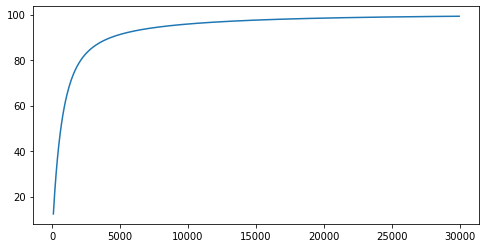

In [7]:
# took 47.999 seconds
filename = 'eH_loop512_xband_zcw377_scan1d_loop.result'
filepath = os.path.join(datadir, filename)
df = pd.read_csv(filepath, skiprows=2, header=None)
fig = plt.figure(figsize=(8, 4))
plt.plot(df[0], df[1])
plt.show()

#### Field Profile using varied loops

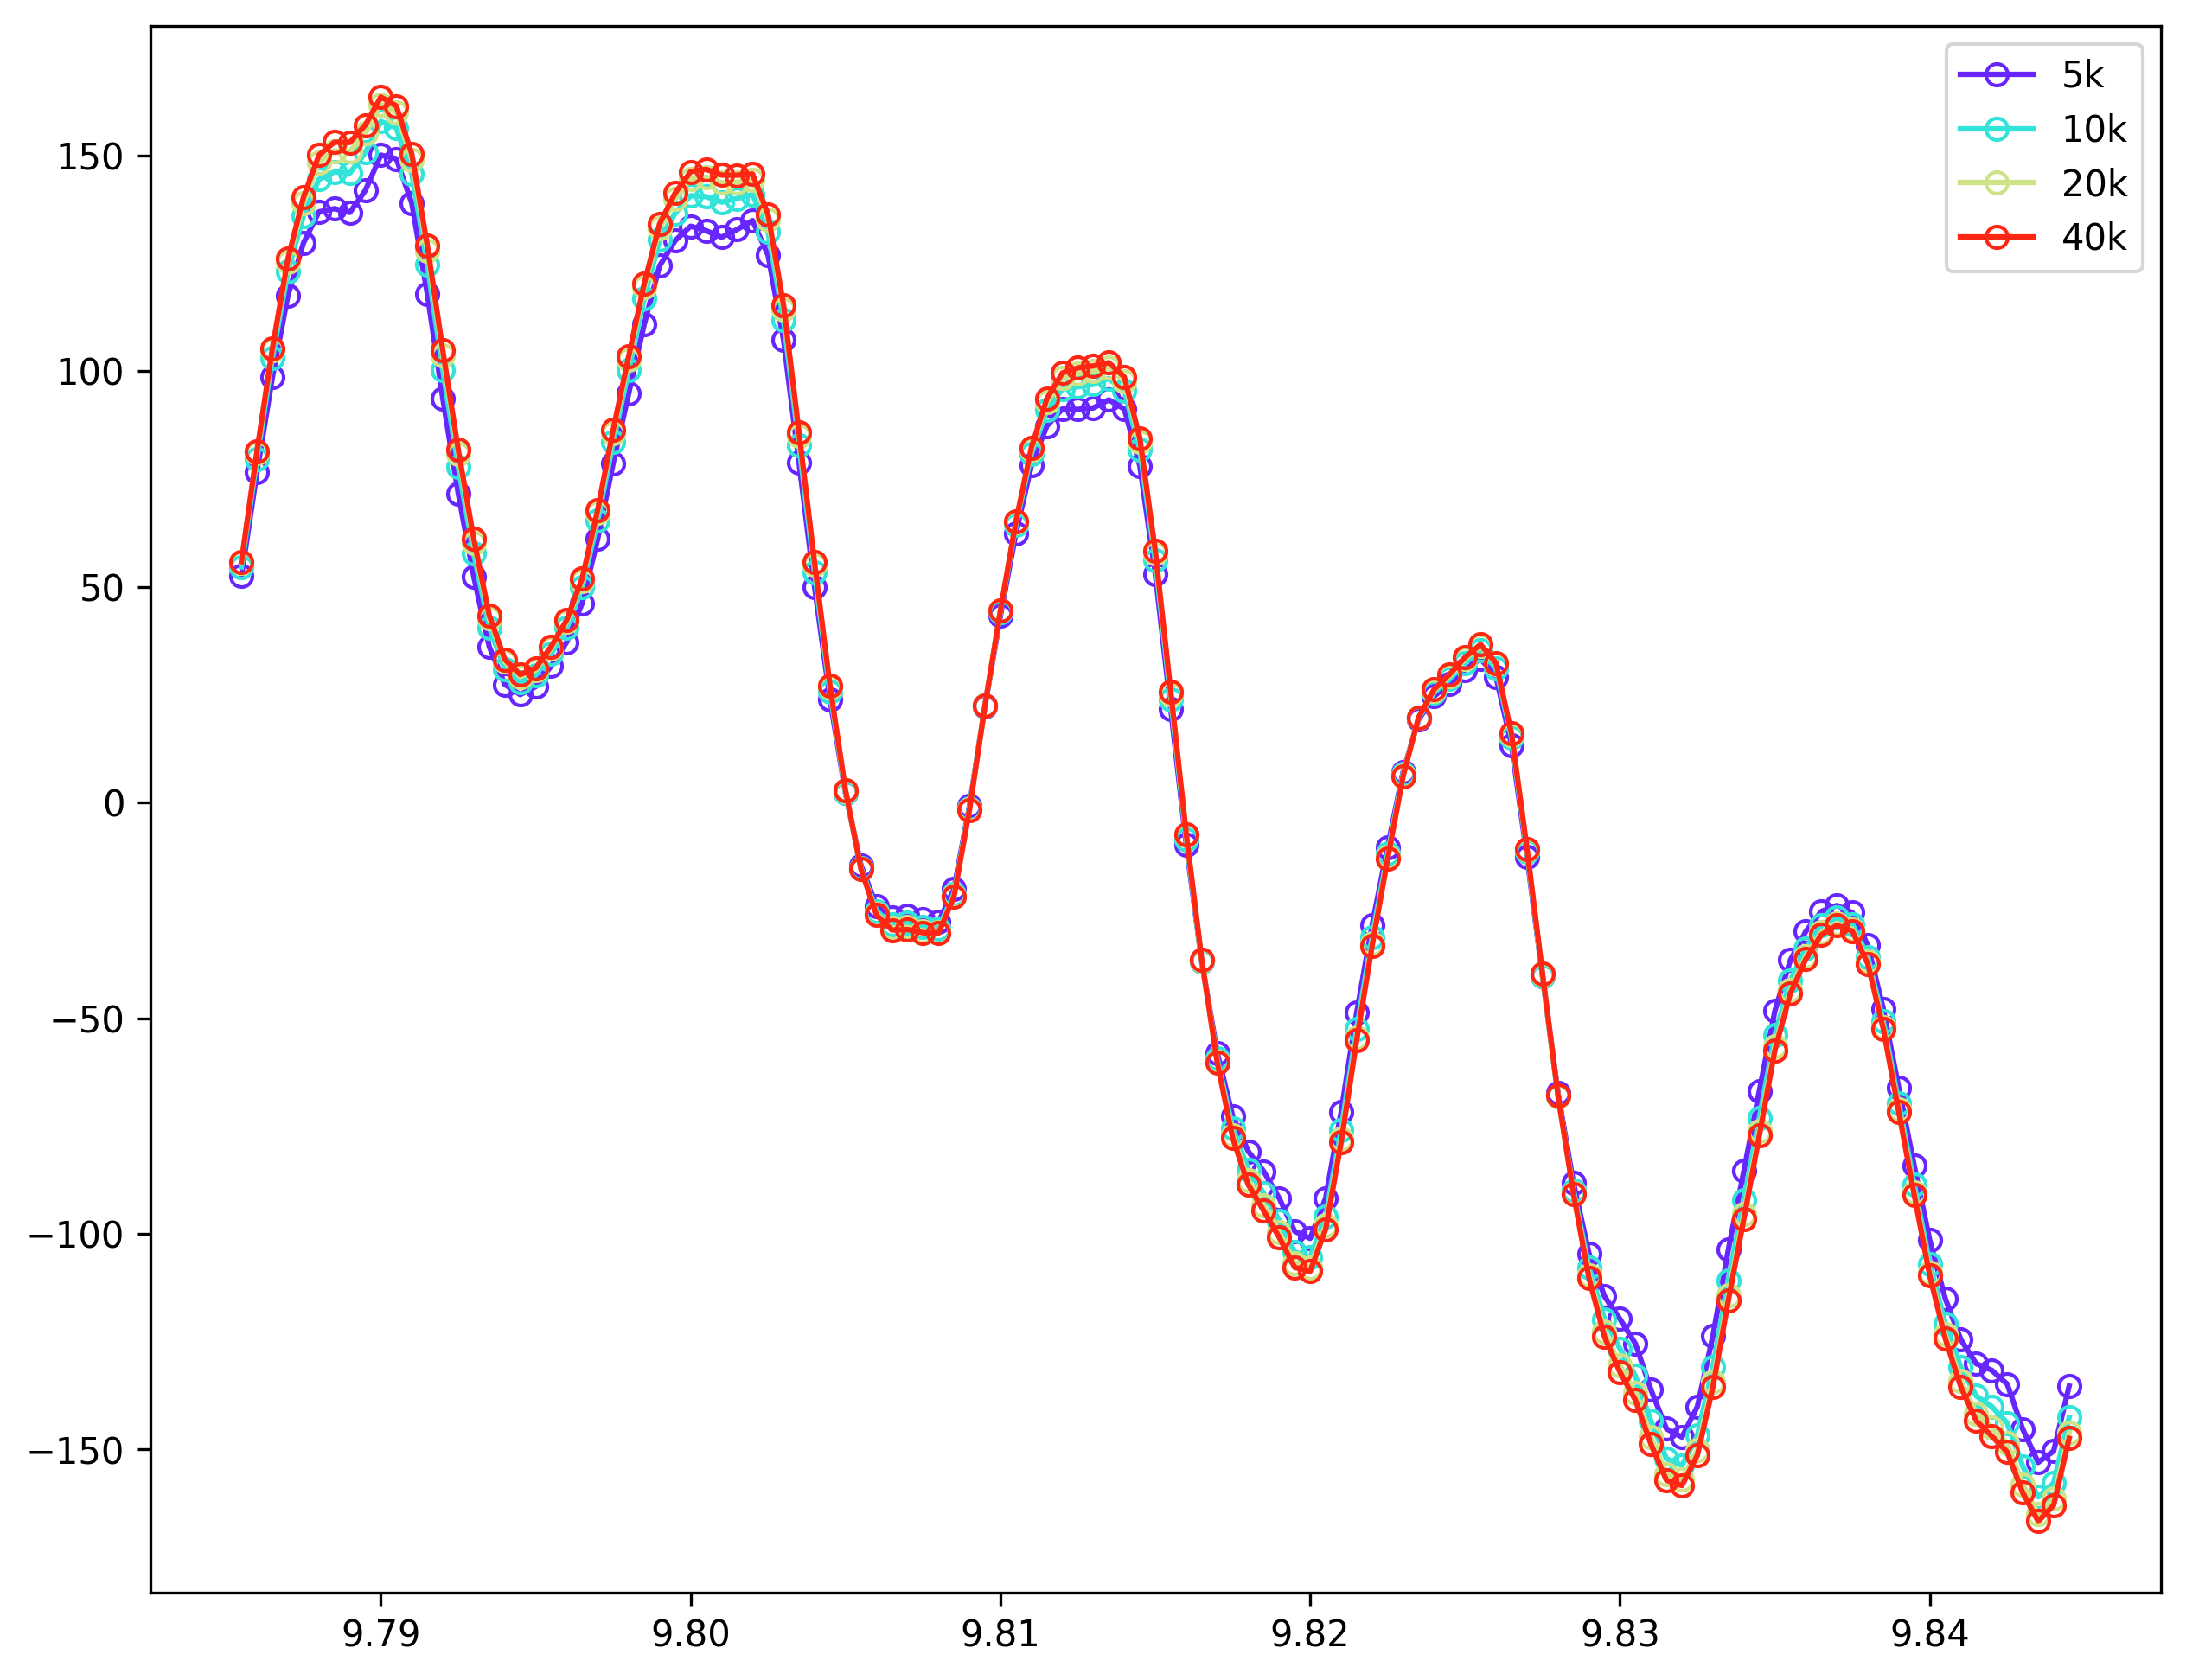

In [10]:
# took 10.63 seconds
loop_counts = [
    '5k',  # took 10.63 seconds
    '10k', # took 10.521 seconds
    '20k', # took 11.471 seconds
    '40k', # took 11.552 seconds
]
filenames = [
    f'eH_loop{cnt}_xband_zcw377_em_fp.result' for cnt in loop_counts
]
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=300)

n = len(filenames)
colors = plt.cm.rainbow(np.linspace(0.05,0.95,n))
for filename, color, cnt in zip(filenames, colors, loop_counts):
    filepath = os.path.join(datadir, filename)
    df = pd.read_csv(filepath, skiprows=2, header=None)
    ax.plot(df[0]/1e9, df[1], color=color, marker='o', markerfacecolor='none', label=cnt)
plt.legend()
# plt.savefig('assets/TOPDNP/topdnp_xband.ps')
# plt.savefig('assets/TOPDNP/topdnp_xband.png')
plt.show()

### 18.8 T (800 MHz)

+ Three spin system eHH

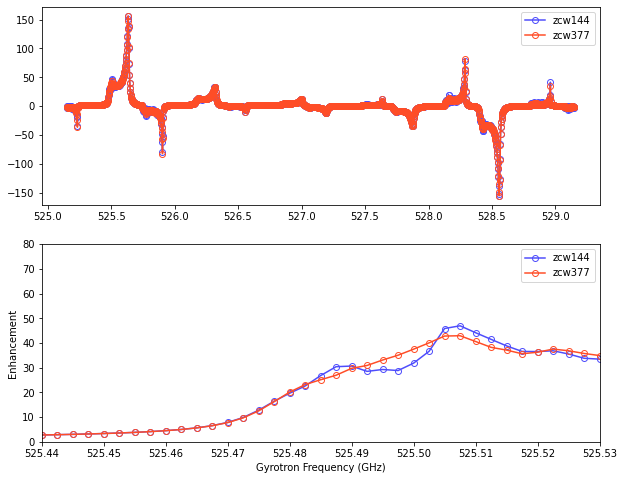

In [11]:
zcws = [
    'zcw144',   # took 1879.987 seconds 4 cores
    'zcw377',   # took 4871.442 seconds 4 cores
]

filenames = [
    f'eHH_gtensor_trityl_a30b90g70_TOPDNP_800MHz_200MHz_train8192_loop262145_{zcw}_em_fp.result' for zcw in zcws
]
n = len(filenames)
colors = plt.cm.rainbow(np.linspace(0.1,0.9,n))

fig, axes = plt.subplots(2,1, figsize=(10, 8))

for filename, color, zcw in zip(filenames, colors, zcws):
    filepath = os.path.join(datadir, filename)
    df = pd.read_csv(filepath, skiprows=2, header=None)
    axes[0].plot(df[0]/1e9, df[1], color=color, marker='o', markerfacecolor='none', label=zcw)
    axes[1].plot(df[0]/1e9, df[1], color=color, marker='o', markerfacecolor='none', label=zcw)
axes[0].legend()
axes[1].set_xlim(525.44, 525.53)
axes[1].set_ylim(0, 80)
axes[1].legend()
plt.xlabel('Gyrotron Frequency (GHz)')
plt.ylabel('Enhancement')

plt.show()

+ eH vs eHH

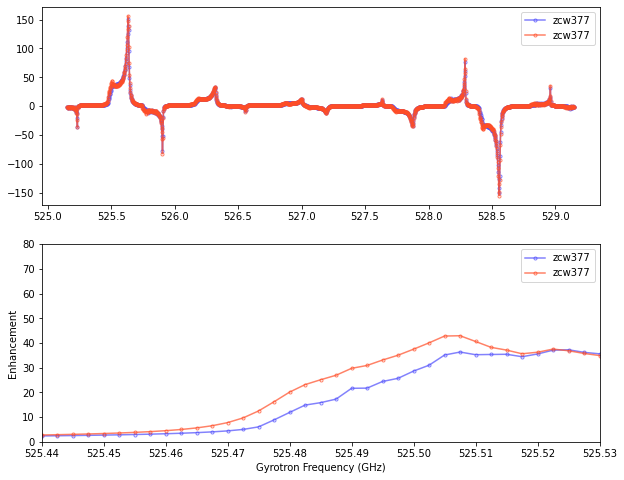

In [12]:
labels = [
    'eH',    # took 231.116 seconds 4 cores
    'eHH',   # took 4871.442 seconds 4 cores
]

filenames = [
    'eH_gtensor_trityl_a30b90g70_TOPDNP_800MHz_200MHz_train8192_loop262145_zcw377_em_fp.result',
    'eHH_gtensor_trityl_a30b90g70_TOPDNP_800MHz_200MHz_train8192_loop262145_zcw377_em_fp.result'
]
n = len(filenames)
colors = plt.cm.rainbow(np.linspace(0.1,0.9,n))

fig, axes = plt.subplots(2,1, figsize=(10, 8))

for filename, color, label in zip(filenames, colors, labels):
    filepath = os.path.join(datadir, filename)
    df = pd.read_csv(filepath, skiprows=2, header=None)
    axes[0].plot(df[0]/1e9, df[1], color=color, marker='.', markerfacecolor='none', label=zcw, alpha=0.7)
    axes[1].plot(df[0]/1e9, df[1], color=color, marker='.', markerfacecolor='none', label=zcw, alpha=0.7)
axes[0].legend()
axes[1].set_xlim(525.44, 525.53)
axes[1].set_ylim(0, 80)
axes[1].legend()
plt.xlabel('Gyrotron Frequency (GHz)')
plt.ylabel('Enhancement')

plt.show()

+ eH varied powder options

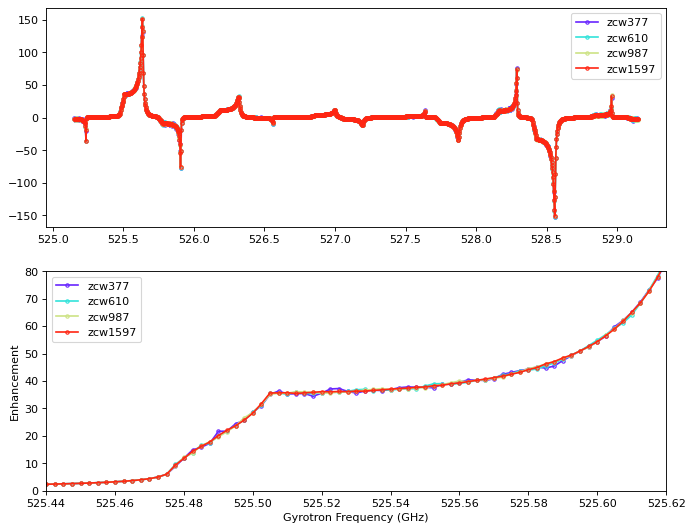

In [13]:
zcws = [
    'zcw377',   # took 196.11 seconds 5 cores; 231.116 seconds 4 cores
    'zcw610',   # took 312.73 seconds 5 cores; 370.184 seconds 4 cores
    'zcw987',   # took 508.415 seconds 5 cores
#     'oct987',   # took 508.76 seconds 5 cores
    'zcw1597'   # took 812.304 seconds
]

filenames = [
    f'eH_gtensor_trityl_a30b90g70_TOPDNP_800MHz_200MHz_train8192_loop262145_{zcw}_em_fp.result' for zcw in zcws
]
n = len(filenames)
colors = plt.cm.rainbow(np.linspace(0.05,0.95,n))

fig, axes = plt.subplots(2,1, figsize=(10, 8), dpi=80)

for filename, color, zcw in zip(filenames, colors, zcws):
    filepath = os.path.join(datadir, filename)
    df = pd.read_csv(filepath, skiprows=2, header=None)
    axes[0].plot(df[0]/1e9, df[1], color=color, marker='.', markerfacecolor='none', label=zcw)
    axes[1].plot(df[0]/1e9, df[1], color=color, marker='.', markerfacecolor='none', label=zcw)
axes[0].legend()
axes[1].set_xlim(525.44, 525.62)
axes[1].set_ylim(0, 80)
axes[1].legend()
plt.xlabel('Gyrotron Frequency (GHz)')
plt.ylabel('Enhancement')
plt.show()

### BuildUp

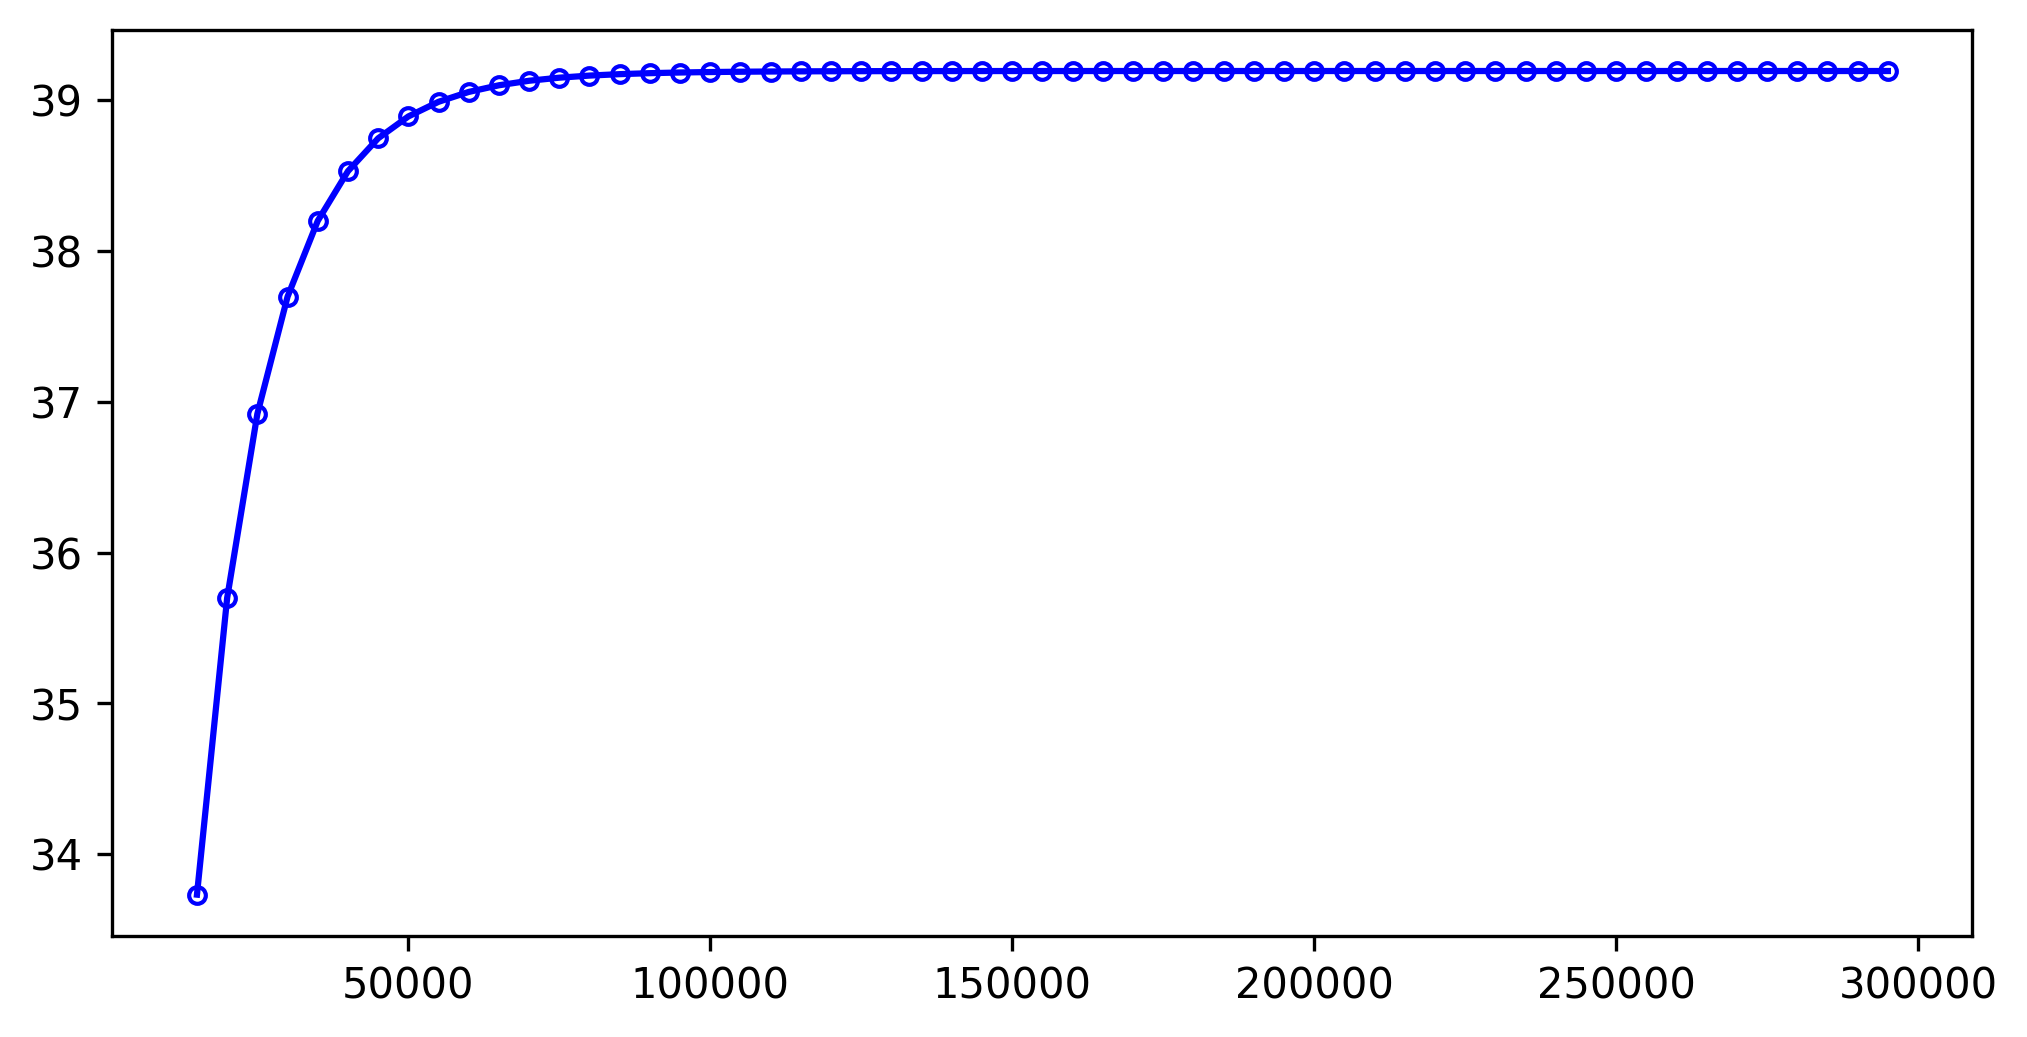

In [14]:
filename = f'eH_gtensor_trityl_a30b90g70_TOPDNP_800MHz_200MHz_train8192_zcw610_scan1d_loop.result'
filepath = os.path.join(datadir, filename)
df = pd.read_csv(filepath, skiprows=2, header=None)
fig = plt.figure(figsize=(8, 4), dpi=300)
plt.plot(df[0], df[1], 'bo-', markersize=4, markerfacecolor='none')
plt.show()

+ Field Profile to export

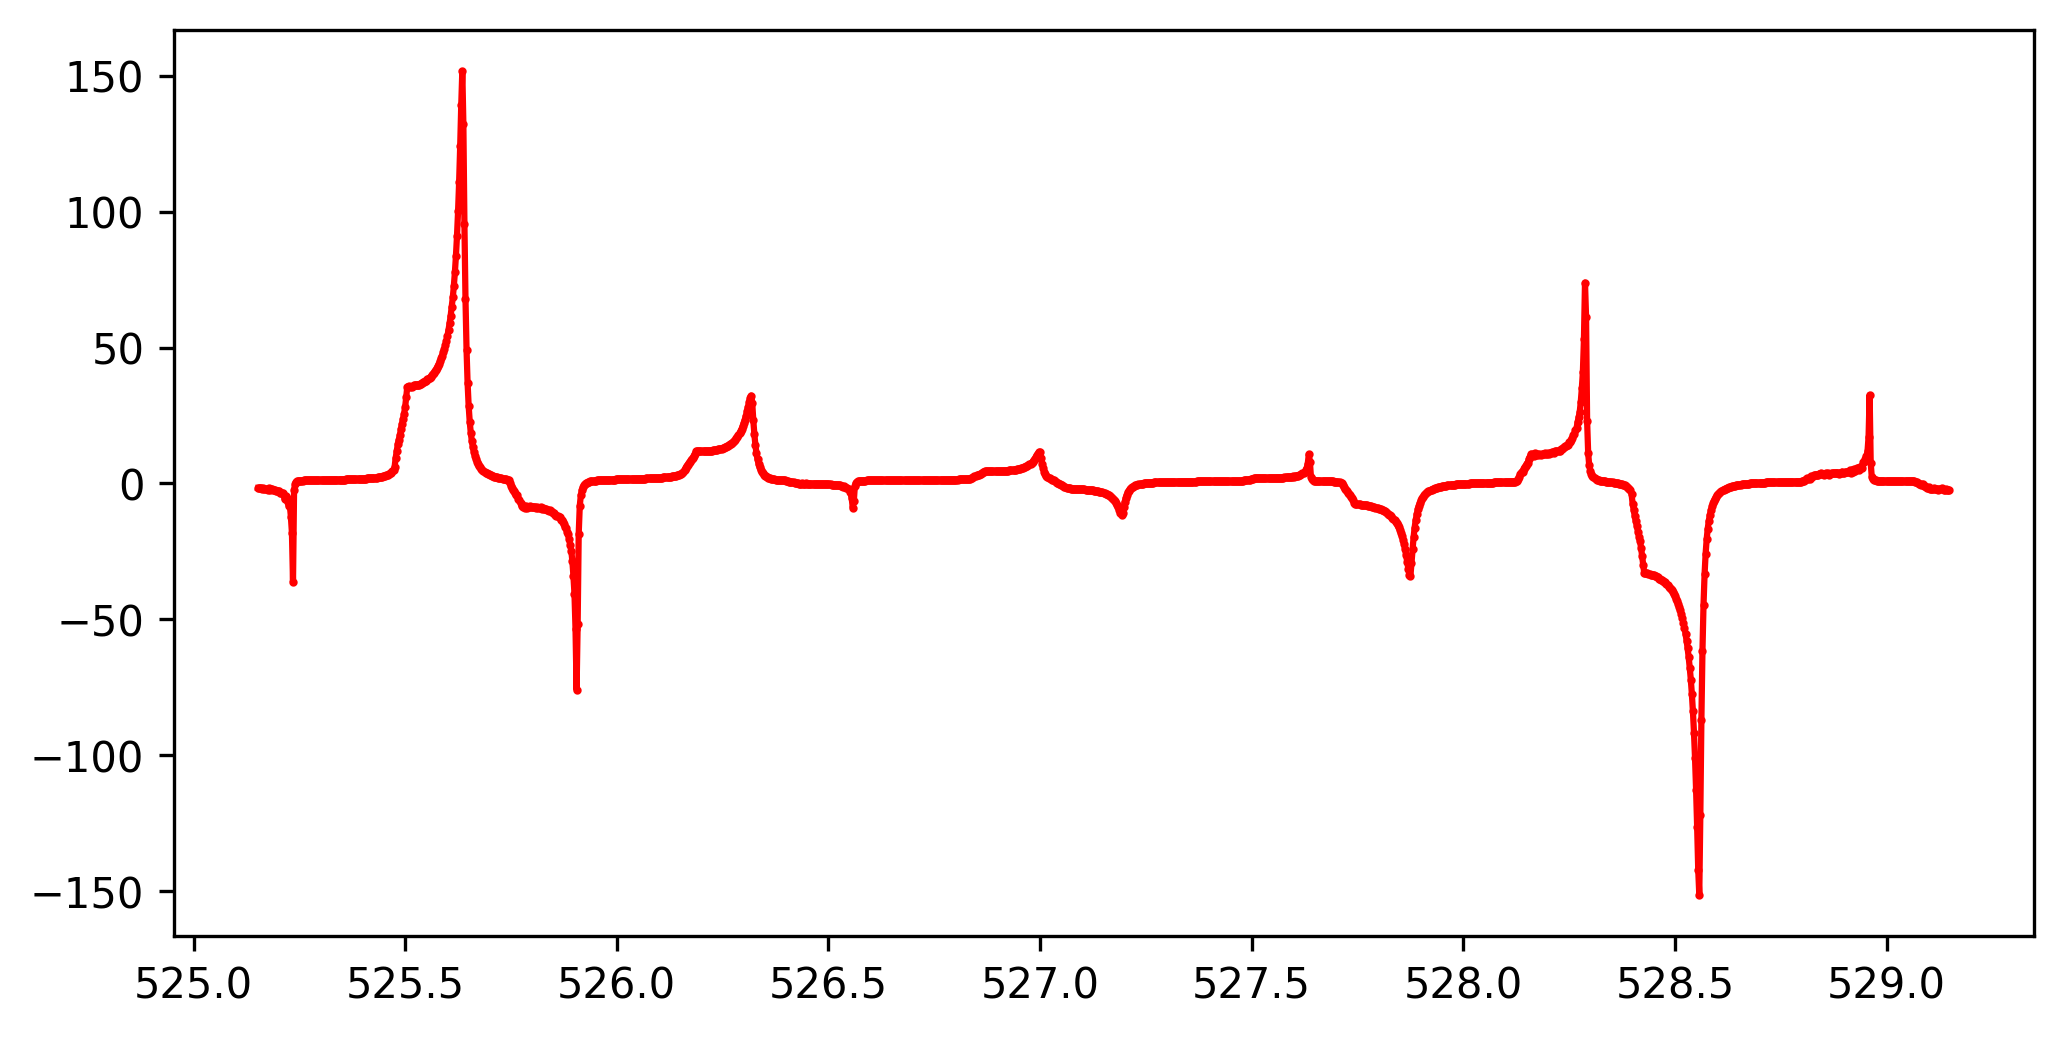

In [15]:
filename = f'eH_gtensor_trityl_a30b90g70_TOPDNP_800MHz_200MHz_train8192_loop262145_zcw1597_em_fp.result'
filepath = os.path.join(datadir, filename)
df = pd.read_csv(filepath, skiprows=2, header=None)
fig = plt.figure(figsize=(8, 4), dpi=300)
plt.plot(df[0]/1e9, df[1], 'r.-', markersize=2, markerfacecolor='none')
plt.savefig('assets/TOPDNP/topdnp_800MHz_trityl.ps')
plt.savefig('assets/TOPDNP/topdnp_800MHz_trityl.png')
plt.show()